In [1]:
import csv
import subprocess
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [15]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.precision", 10)

### Make new blank file

In [21]:
arr = np.arange(2000, 2078.0015, 0.0015)
ones = np.ones(len(arr))

In [22]:
df = pd.DataFrame({'wavenumber': arr, 'one': ones })

In [23]:
df

,wavenumber,one
0,2000.0000000000,1.0
1,2000.0015000000,1.0
2,2000.0030000000,1.0
3,2000.0045000000,1.0
4,2000.0060000000,1.0
...,...,...
51996,2077.9940000041,1.0
51997,2077.9955000041,1.0
51998,2077.9970000041,1.0
51999,2077.9985000041,1.0


In [24]:
df.to_csv('co2-2000-2078_0^0015cm.csv')

### Interpolate mixing ratio

In [16]:
pressures = np.array([11.79, 47.33, 75.19, 112.05, 299.92, 521.86, 744.22, 1010.58])
mixing_ratios = np.array([0.143551, 0.031886, 0.049121, 0.042584, 0.044708, 0.038422, 0.026773, 0.01974])

# New pressure values for interpolation
new_pressures = np.arange(1000, 0, -20)

# Interpolated mixing ratios
interpolated_ratios = np.interp(new_pressures, pressures, mixing_ratios)

df = pd.DataFrame({'Pressure (mbar)': new_pressures, 'Interpolated Mixing Ratio': interpolated_ratios })

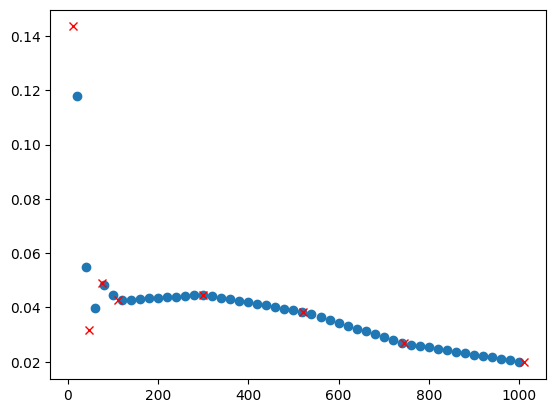

In [17]:
plt.plot(new_pressures, interpolated_ratios, 'o')
plt.plot(pressures, mixing_ratios, 'x', color = 'r')

In [19]:
df.to_csv('inter_mr.csv')

### Plot m

In [74]:
def add_m(file):
    yy = pd.read_csv(file)
    filteryy = yy[(yy['Dicke'] != 0) & (yy['Speed'] != 0)]
    filteryyy = filteryy[(filteryy['Position'] > 0.5)]

    adf = filteryy[(filteryy['Position'] < 0.5)]
    dke = np.array(adf['Dicke'])
    sde = np.array(adf['Speed'])
    filteryyy['Dicke_err'] = dke
    filteryyy['Speed_err'] = sde

    
    filteryyy['m'] = np.arange(-54, -4, 2)
    filteryyy.to_csv(f'{file}_mdf.csv')
    
    return filteryyy       

In [76]:
yo = add_m('dpr_50spec_snr1000_ls.csv')

In [78]:
def plot_m(df, label):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.errorbar(df['m'], df['Dicke'], yerr=df['Dicke_err'], fmt='o',  color = 'black', capsize=5, label = label)
    ax1.set_xlabel('m')
    ax1.set_ylabel('Dicke')
    ax1.set_ylim(0.01, 0.05)
    #ax1.set_ylim(0, 0.02)
    #ax1.axhline(y=0.03, color='r', linestyle='--')
    #ax1.legend()

    ax2.errorbar(df['m'], df['Speed'], yerr=df['Speed_err'], fmt='o', capsize=5,  color = 'black', label = label)
    ax2.set_xlabel('m')
    ax2.set_ylabel('Speed')
    ax2.set_ylim(0, 0.2)
    #ax2.axhline(y=0.1, color='r', linestyle='--')
    #ax2.legend()
    
    fig.suptitle('Air-broadened spectra with pressure in 20(mbar) increments, SNR 1000')
    plt.savefig(f'{label}.png')
    plt.show()

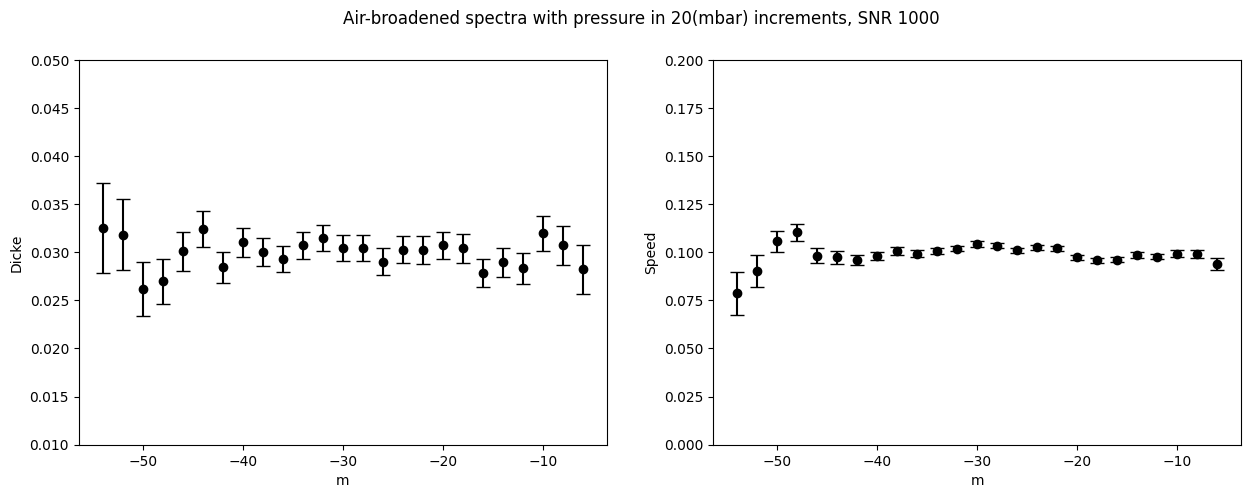

In [79]:
plot_m(yo, 'dpr_50spec_snr1000_mplot')

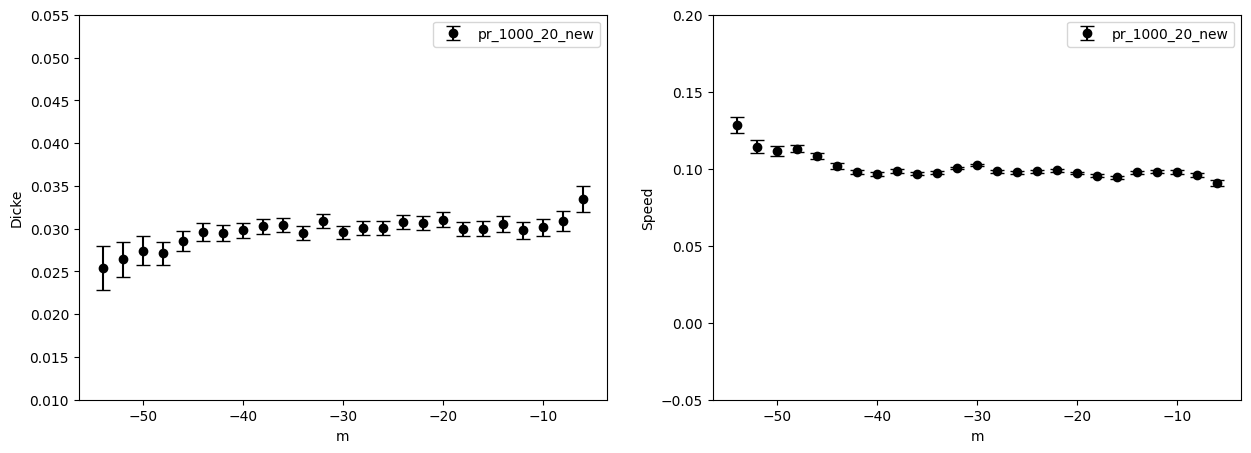

In [28]:
plot_m(filteryyy, 'pr_1000_20_new')

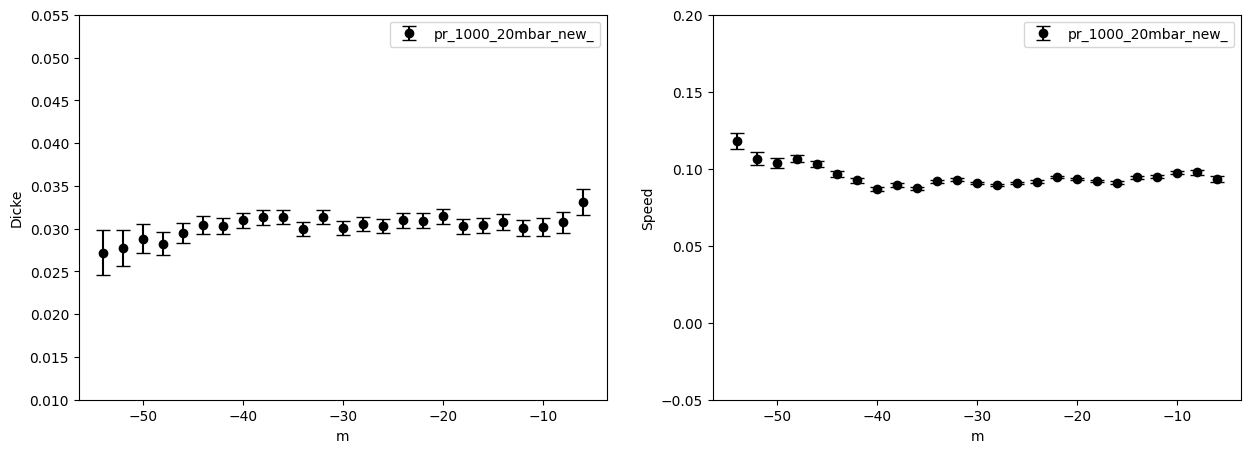

In [104]:
plot_m(pr_df, 'pr_1000_20mbar_new_')

#### old ver

In [8]:
'''
def add_m(file):
    tt = pd.read_csv('CO2_hitran.par', sep='\s+', header = None, names=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j', 'k', 'l', 'o', 'p'])
    tt['m'] = tt['h'].str.extract(r'(\d+)')
    tt['a']=tt['a'].round(4)
    #rdf = tt[tt['a'] == 2039.9233]

    yy = pd.read_csv(file)
    filteryy = yy[(yy['Dicke'] != 0) & (yy['Speed'] != 0)]
    filteryy['Position']=filteryy['Position'].round(4)
    filteryyy = filteryy[(filteryy['Position'] > 0.5)]

    adf = filteryy[(filteryy['Position'] < 0.5)]
    dke = np.array(adf['Dicke'])
    sde = np.array(adf['Speed'])
    filteryyy['Dicke_err'] = dke
    filteryyy['Speed_err'] = sde

    filtered_df = tt[tt['a'].isin(filteryyy['Position'])]
    #filtered_df = pd.concat([filtered_df, rdf], ignore_index = True)
    #filtered_df = filtered_df.sort_values(by='a', ascending=True)
    if len(filtered_df) != len(filteryyy):
        diff = abs(len(filtered_df)-len(filteryyy))
        print(f'missing {diff} lines')
        r = np.array(filtered_df['m'].astype('float'))
        filteryyy['m'] = r * -1
    else:
        r = np.array(filtered_df['m'].astype('float'))
        filteryyy['m'] = r * -1
    filteryyy.to_csv(f'dw_{file}')
    
    return filteryyy    
'''

### Extract code

In [107]:
edf = pd.read_csv('code.csv')

In [108]:
filter = edf[(edf['Dicke'] != 0) & (edf['Speed'] != 0)]

In [109]:
filter

,Code,Gas,Iso,Position,Dicke,Mixing,Speed
346,164.0,CO2,1.0,2035.405410000000074,0.00922,0.0000000,0.06875
364,173.0,CO2,1.0,2036.908181000000013,0.00431,0.0000000,0.10447
430,205.0,CO2,1.0,2038.414164000000028,0.00749,0.0000000,0.08239
470,225.0,CO2,1.0,2039.923250000000053,0.00657,0.0000000,0.08847
504,241.0,CO2,1.0,2041.435336999999890,0.00654,0.0000000,0.09073
540,257.0,CO2,1.0,2042.950323000000026,0.00486,0.0000000,0.09446
572,272.0,CO2,1.0,2044.468112999999903,0.00398,0.0000000,0.09565
610,291.0,CO2,1.0,2045.988614000000098,0.00475,0.0000000,0.09548
654,312.0,CO2,1.0,2047.511737000000039,0.00498,0.0000000,0.09594
688,329.0,CO2,1.0,2049.037397000000055,0.00360,0.0000000,0.09983


In [31]:
code = np.array(filter['Code']).astype(int)
code

array([164, 173, 205, 225, 241, 257, 272, 291, 312, 329, 373, 436, 471,
       507, 526, 538, 552, 566, 604, 632, 650, 691, 705, 715, 725])

### Auto .cal to .uus

In [38]:
sdf = pd.read_csv('sample.csv') #read in sample data file
sdf.set_index('Run')

,pressure_mbar,pressure_torr,pathlength_m,temperature,mixing_ratio,mr_2,file_name,sim_run_num,resolution(cm-1),point spacing,FOV,MOPD,hitran gas code,hgc_2,nu_min,nu_max,ap_code
Run,,,,,,,,,,,,,,,,,
1,20.54,15.406266960,1.6580,22.85,1.000000,0,testing_r1,4,0.003,0.0015,0.0000075967,300,2,6,2000,2150,0
2,50.10,37.578090300,1.6580,22.85,1.000000,0,testing_r2,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
3,101.24,75.936244760,0.8503,22.85,1.000000,0,testing_r3,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
4,214.73,161.060745100,0.8503,22.85,1.000000,0,testing_r4,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
5,300.03,225.041006700,0.8503,22.85,1.000000,0,testing_r5,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
6,11.79,8.843227239,19.3430,22.85,0.143551,0,testing_r6,4,0.003,0.0015,0.0000075967,300,2,6,2000,2150,0
7,47.33,35.500419440,19.3430,22.85,0.031886,0,testing_r7,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
8,75.19,56.397137920,19.3430,22.85,0.049121,0,testing_r8,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
9,112.05,84.044411550,19.3430,22.85,0.042584,0,testing_r9,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0


In [40]:
sdf = sdf[:4]

In [42]:
sdf.set_index('Run')

,pressure_mbar,pressure_torr,pathlength_m,temperature,mixing_ratio,mr_2,file_name,sim_run_num,resolution(cm-1),point spacing,FOV,MOPD,hitran gas code,hgc_2,nu_min,nu_max,ap_code
Run,,,,,,,,,,,,,,,,,
1,20.54,15.40626696,1.6580,22.85,1.0,0,testing_r1,4,0.003,0.0015,0.0000075967,300,2,6,2000,2150,0
2,50.10,37.57809030,1.6580,22.85,1.0,0,testing_r2,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
3,101.24,75.93624476,0.8503,22.85,1.0,0,testing_r3,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0
4,214.73,161.06074510,0.8503,22.85,1.0,0,testing_r4,6,0.006,0.0030,0.0000075967,150,2,6,2000,2150,0


### Add noise/Save to .asc

In [29]:
def add_noise(arr, snr):
    arr_noisy = arr + np.max(arr)*np.random.normal(loc = 0, scale =1, size = len(arr))*1/snr 
    return arr_noisy

In [46]:
def read_cal(sdf):
    dfl = []
    for index, row in sdf.iterrows():
        df = pd.read_csv(f'{row['file_name']}.cal', sep='\s+', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance'])
        dfl.append(df)
    return dfl

In [48]:
def adding(labfit, sdf, snr):
    for index, row in sdf.iterrows(): 
        i = index
        arr = labfit[i]['Transmittance']
        labfit[i]['Transmittance_noisy'] = add_noise(arr, snr)
        labfit[i].to_csv(f'{row['file_name']}_snr{snr}.csv', index = False)

        labfit[i][r'Wavenumber ($cm^{-1}$)'] = labfit[i][r'Wavenumber ($cm^{-1}$)'].apply(lambda x: f"{x:.4f}")
        numlen = len(labfit[i])
        num_line = pd.DataFrame({r'Wavenumber ($cm^{-1}$)':numlen, 'Transmittance':np.nan, 'Transmittance_noisy':np.nan}, index =[0]) #add number of lines to top of asc file
        labfit[i] = pd.concat([num_line, labfit[i]]).reset_index(drop = True)
        labfit[i][[r'Wavenumber ($cm^{-1}$)', 'Transmittance_noisy']].to_csv(f'{row['file_name']}.asc', sep = ' ', index = False, header = False)

In [50]:
adding(read_cal(sdf), sdf, 2000)

#### calculating spec difference

In [31]:
newdf = read_cal(sdf)

In [33]:
olddf = read_cal(sdf)

In [34]:
olddf[0]

,Wavenumber ($cm^{-1}$),Transmittance
0,2000.0000,1.0000000000
1,2000.0015,1.0000000000
2,2000.0030,1.0000000000
3,2000.0045,1.0000000000
4,2000.0060,1.0000000000
...,...,...
51996,2077.9940,0.9996674657
51997,2077.9955,0.9996576309
51998,2077.9970,0.9996465445
51999,2077.9985,0.9996340275


In [35]:
def calc_diff(ndf, odf):
    for i in range(len(ndf)):
        ndf[i]['difference'] = np.array(ndf[i]['Transmittance'])-np.array(odf[i]['Transmittance'])
    return ndf    

In [36]:
ddf = calc_diff(newdf, olddf)

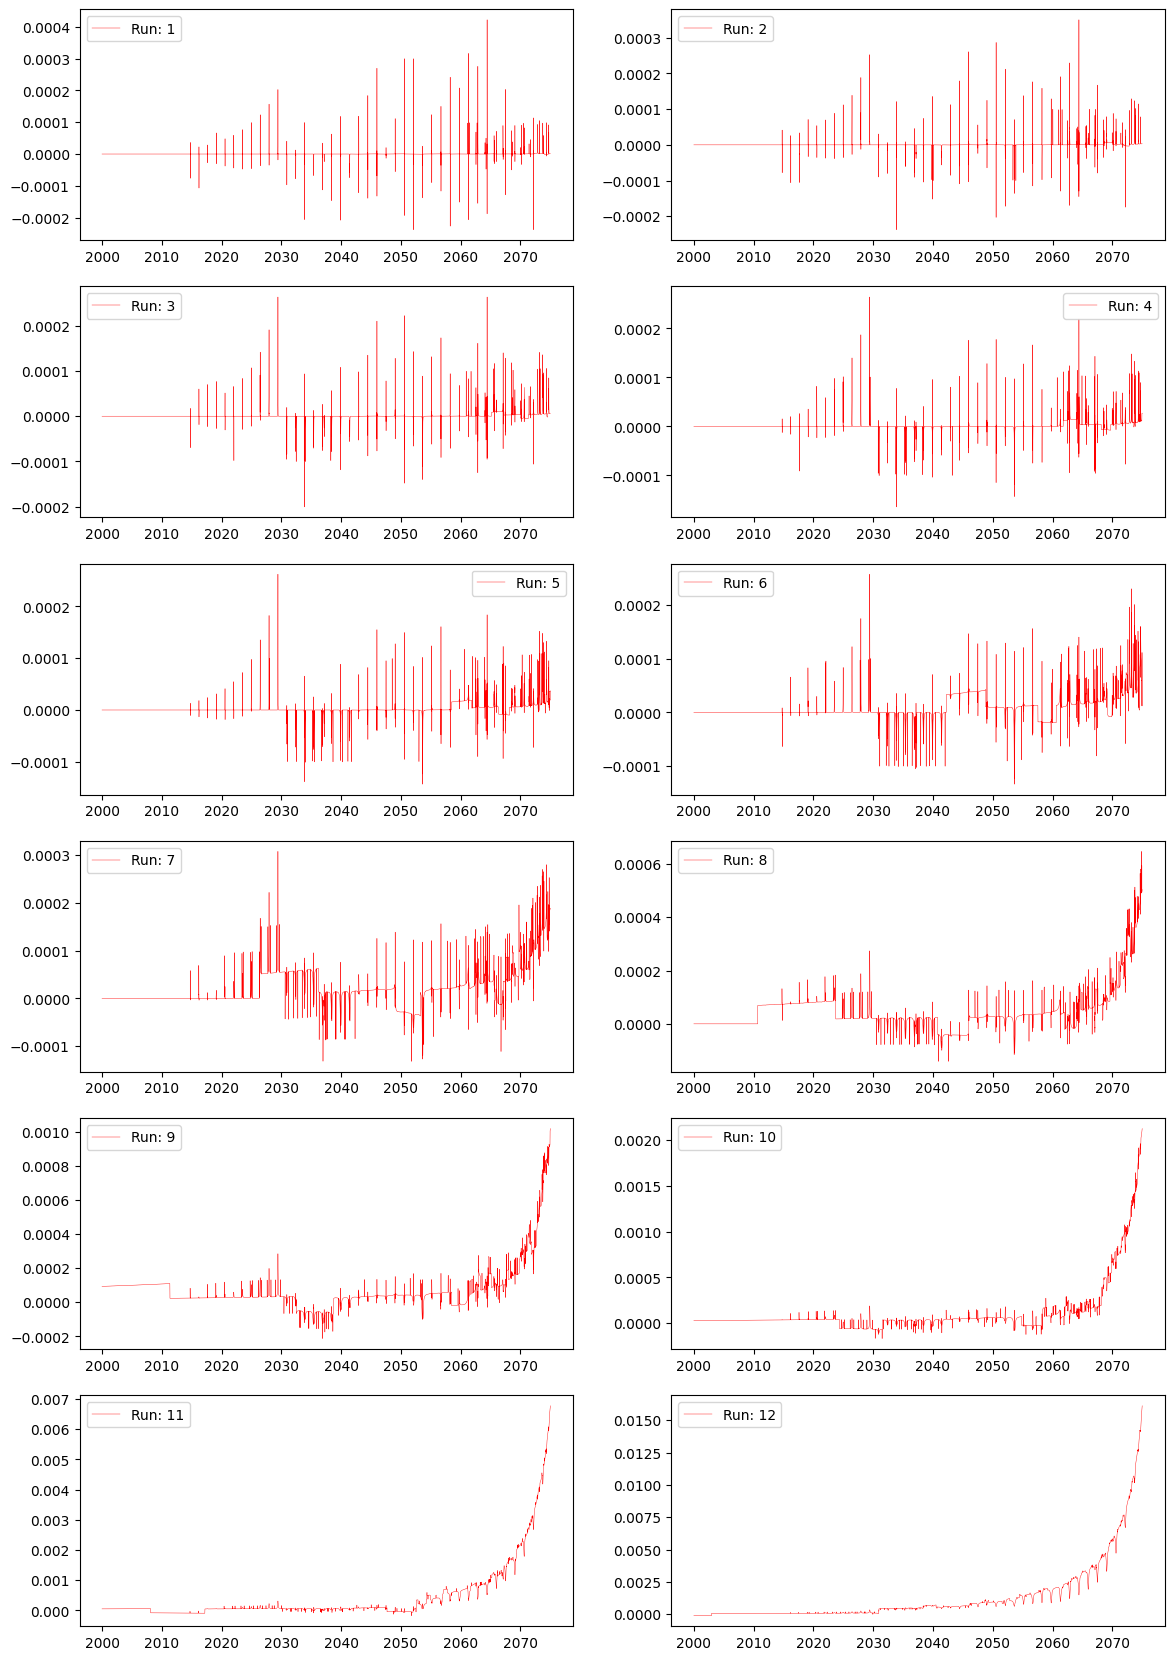

In [44]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 21))
axes = axes.flatten()
for i in range(12):
    df = ddf[i][:50000]
    axes[i].plot(df[r'Wavenumber ($cm^{-1}$)'], df['difference'], linewidth = 0.3, label= f'Run: {i+1}', color = 'r')    
    axes[i].legend()

### asc to uus(bom +cond)

In [72]:
def spec_bin(sdf): #.asc to .bin
    for index, row in sdf.iterrows():
        p1 = f'{row['file_name']}.asc'
        p2 = f'{row['file_name']}.bin'

        process = subprocess.Popen(['bomemcnv.exe'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        process.communicate(input=f"{p1}\n{p2}\n\n")

        process.wait()        

In [70]:
def spec_ap(sdf): #if need apodisation
    for index, row in sdf.iterrows():
        p1 = f'{row['file_name']}.bin'
        p2 = f"{row['nu_min']}"
        p3 = f"{row['nu_max']}"
        p4 = f"{row['point spacing']}"
        p5 = f"{row['MOPD']}"
        p6 = f"{row['ap_code']}"

        process = subprocess.Popen(['apodize.exe'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        process.communicate(input=f"\n{p1}\n{p2}\n{p3}\n{p4}\n{p5}\n{p6}")

        #process.wait()

In [78]:
def spec_cond(sdf): #.bin to .uus
    for index, row in sdf.iterrows():
        run = index+1
        p1 = f'{row['file_name']}.bin'
        p2 = f'{row['file_name']}.uus' #change extension if apodized
        p3 = 'N'
        p4 = f"{run}" #run number
        p5 = 'A' #for fts spec
        p6 = 'No'
        p7 = f"{row['MOPD']}"
        p8 = f"{row['FOV']}"
        p9 = f"{row['hitran gas code']}" #gas code for first absorber
        p10 = f"{row['hgc_2']}" #gas code for second absorber
        p11 = '0' #only 2 absorbing gas  
        p12 = f"{row['mixing_ratio']}" 
        p13 = f"{row['mr_2']}" 
        p14 = 'n' #only 2 path
        p15 = f"{row['pathlength_m']}"
        p16 = f"{row['pressure_torr']}"
        p17 = f"{row['temperature']}"
        p18 = f"{row['nu_min']}"
        p19 = f"{row['nu_max']}"
        p20 = f"{row['point spacing']}"
        p21 = '0' #Fraction of first path triple passed
        p22 = 'y'
        p23 = 'y'
        p24 = f"{row['ap_code']}"
        

        process = subprocess.Popen(['condense.exe'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        process.communicate(input=f"{p1}\n{p2}\n{p3}\n{p4}\n{p5}\n{p6}\n{p7}\n{p8}\n{p9}\n{p10}\n{p11}\n{p12}\n{p13}\n{p14}\n{p15}\n{p16}\n{p17}\n{p18}\n{p19}\n{p20}\n{p21}\n{p22}\n{p23}\n{p24}\n")

        process.wait()   

In [76]:
spec_bin(sdf)

In [66]:
spec_ap(sdf)

In [80]:
spec_cond(sdf)

### Get derivative values

In [82]:
line_num = [1608,1615,1644,1654,1660,1665,1668,1672,1677,1683,1713,1721,1724,1743,1746,1749,1752,1755,1759,1762,1765,1768,1771,1775,1780]

In [26]:
def get_deriv(file, num_spec, line_num):
    fdf = pd.DataFrame({'Run': np.arange(1, num_spec+1)})
    for code in line_num:
        ddf = pd.read_csv(f'{file}_{code}.der', sep='\s+', header = None, names=['Position', 'Derivative', 'run_num'])
        ddf = ddf[ddf['Derivative'] != 0]
        dr_avg = []
        for i in range(num_spec):
            run = i+1
            df= ddf[ddf['run_num'] == run]
            dr_avg.append(np.abs(df['Derivative']).mean())
        fdf[f'{code}'] = dr_avg
    fdf = fdf.set_index('Run')
    fdf['Average'] = fdf.mean(axis=1)
    fdf.to_csv(f'{file}_deriv.csv', index = False)
    return fdf  

In [ ]:
ddf2 = get_deriv('snr2000_dicke', 50, line_num)

In [ ]:
sddf2 = get_deriv('snr2000_sd', 50, line_num)

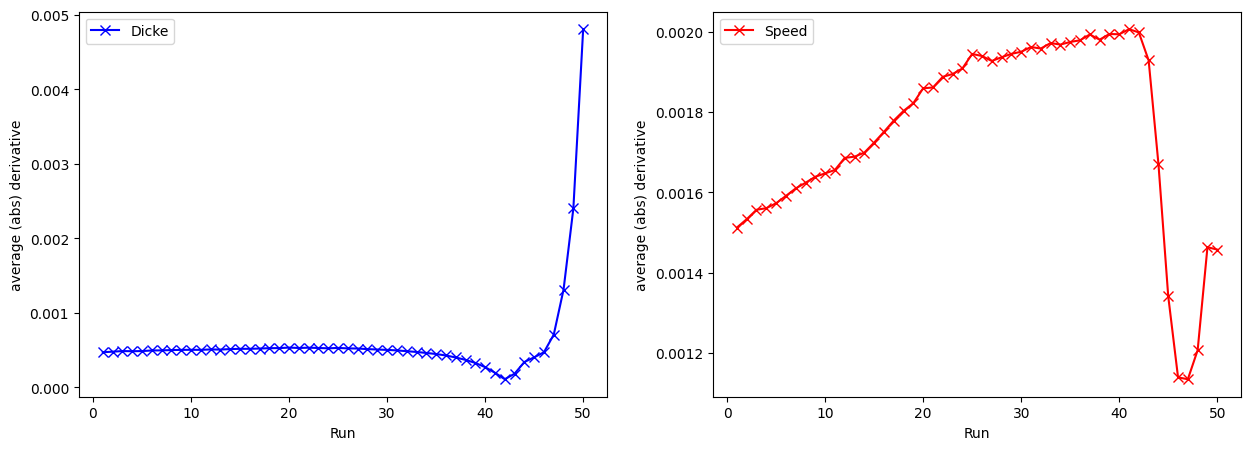

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(ddf2.index, ddf2['Average'], marker='x', linestyle='-', color='b', markersize=7, label = 'Dicke')
ax1.set_xlabel('Run')
ax1.set_ylabel('average (abs) derivative')
ax1.legend()

ax2.plot(sddf2.index, sddf2['Average'], marker='x', linestyle='-', color='r', markersize=7, label = 'Speed')
ax2.set_xlabel('Run')
ax2.set_ylabel('average (abs) derivative')
ax2.legend()

plt.savefig('50spec_snr_2000_deriv.png')